### **Using Sklearn**

In [39]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [29]:
X, y = make_regression(n_samples=100, n_features=1,
                       n_informative=1, n_targets=1, noise=20, random_state=13)


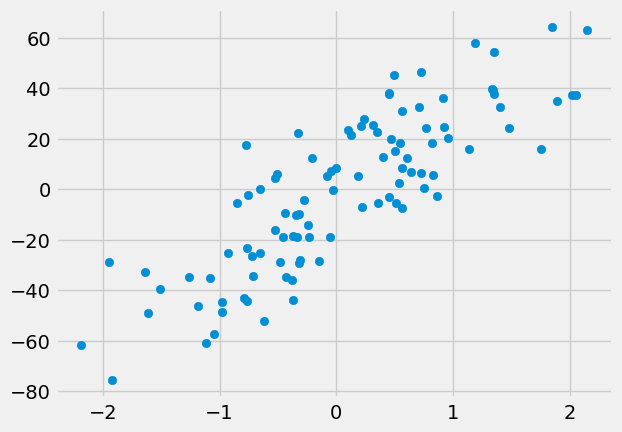

In [30]:
plt.scatter(X, y)


In [31]:
from sklearn.linear_model import LinearRegression


In [32]:
lr = LinearRegression()
lr.fit(X, y)
print('Coefficinet:', lr.coef_)
print('Intercept:', lr.intercept_)


Coefficinet: [27.82809103]
Intercept: -2.29474455867698


In [33]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(X, y)
print('Coefficient:', rr.coef_)
print('Intercept:', rr.intercept_)


Coefficient: [24.9546267]
Intercept: -2.1269130035235726


In [34]:
rr1 = Ridge(alpha=100)
rr1.fit(X, y)
print('Coefficient:', rr.coef_)
print('Intercept:', rr.intercept_)


Coefficient: [24.9546267]
Intercept: -2.1269130035235726


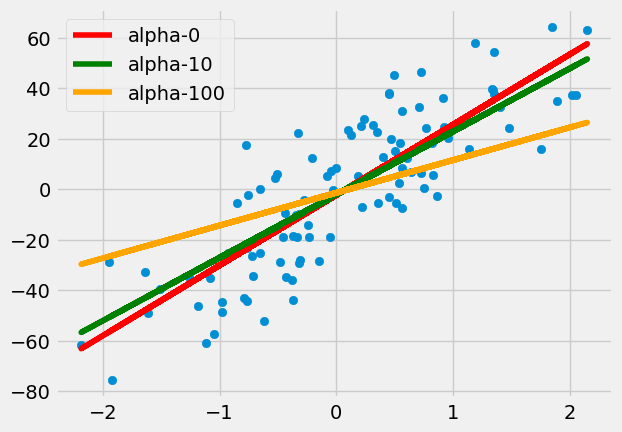

In [35]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color='red', label='alpha-0')
plt.plot(X, rr.predict(X), color='green', label='alpha-10')
plt.plot(X, rr1.predict(X), color='orange', label='alpha-100')
plt.legend()


### **Code from scratch**

In [36]:
class Ridge_Regularization:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self, x_train, y_train):
        num = 0
        den = 0
        for i in range(x_train.shape[0]):
            num = num + (y_train[i] - y_train.mean()) * \
                (x_train[i] - x_train.mean())
            den = den + ((x_train[i] - x_train.mean()) ** 2)

        self.m = num / (den + self.alpha)
        self.b = y_train.mean() - (self.m * x_train.mean())
        print(self.m, self.b)

    def predict(x_test):
        pass


In [37]:
reg = Ridge_Regularization(alpha=10)
reg.fit(X, y)


[24.9546267] [-2.126913]


In [38]:
reg = Ridge_Regularization(alpha=10)
reg.fit(X, y)


[24.9546267] [-2.126913]


### **nD Ridge Regularization from scratch**

In [40]:
X, y = load_diabetes(return_X_y=True)


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)


In [42]:
reg = Ridge(alpha=0.1, solver='cholesky')
reg.fit(x_train, y_train)


Ridge(alpha=0.1, solver='cholesky')

In [43]:
y_pred = reg.predict(x_test)
r2_score(y_test, y_pred)


0.46931288533098026

In [44]:
print(reg.coef_)
print(reg.intercept_)


[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [47]:
class Ridge_Regularization_nD:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, x_train, y_train):
        # insert 1 at first digit of row
        # insert 1 at 0th position (0,1 means)
        x_train = np.insert(x_train, 0, 1, axis=1) 
        
        # creating identity metrics as a same shape of x_train
        I = np.identity(x_train.shape[1])
        
        
        result = np.linalg.inv(np.dot(x_train.T, x_train)
                               + self.alpha * I).dot(x_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]

    def predict(self, x_test):
        return np.dot(x_test, self.coef_) + self.intercept_


In [48]:
reg = Ridge_Regularization_nD()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test, y_pred))
print(reg.coef_)
print(reg.intercept_)


0.4692136155993193
[  44.04252774 -241.72019592  452.99153345  332.06044266  -76.32617866
  -68.54884462 -165.01664054  149.93980143  431.59483654   58.54419942]
150.8476272002317


**scratch code outputs are not same as sklearn library because in identity metrics sklearn library use 0 at first row first col (I[0][0]) instead of 1**

![Alt text](image.png)

In [49]:
class Ridge_Regularization_nD:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, x_train, y_train):
        # insert 1 at first digit of row
        # insert 1 at 0th position (0,1 means)
        x_train = np.insert(x_train, 0, 1, axis=1)

        # creating identity metrics as a same shape of x_train
        I = np.identity(x_train.shape[1])

        I[0][0] = 0
        result = np.linalg.inv(np.dot(x_train.T, x_train)
                               + self.alpha * I).dot(x_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]

    def predict(self, x_test):
        return np.dot(x_test, self.coef_) + self.intercept_


In [50]:
reg = Ridge_Regularization_nD()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test, y_pred))
print(reg.coef_)
print(reg.intercept_)


0.4693128853309806
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602813
